In [23]:
import numpy as np
import pandas as pd

## Visualization of Power Output Data

### 25th, 50th (Median), 75th Quantiles of Each Power Source

In [24]:
data = np.load("raw_preds.npy")
fuel_elements = ['COL', 'NG', 'NUC', 'OIL', 'OTH', 'SUN', 'WAT', 'WIND']
days = ['01/01/2024', '01/02/2024', '01/03/2024', '01/04/2024', '01/05/2024', '01/06/2024', '01/07/2024', '01/08/2024']
df = pd.DataFrame(columns=['Fuel_Type', 'Hour', '0.02', '0.1', '0.25', '0.5', '0.75', '0.9', '0.98'])

data

array([[[5.64616504e+03, 9.40786133e+03, 1.17680996e+04, ...,
         1.67246660e+04, 1.96242266e+04, 2.41323789e+04],
        [5.63305176e+03, 9.40260352e+03, 1.16290234e+04, ...,
         1.65840078e+04, 1.96697617e+04, 2.38121641e+04],
        [5.54865234e+03, 9.19471680e+03, 1.13610557e+04, ...,
         1.61723545e+04, 1.93729883e+04, 2.31202793e+04],
        ...,
        [6.18163770e+03, 9.23184473e+03, 1.15880439e+04, ...,
         1.60507598e+04, 1.96481309e+04, 2.38172461e+04],
        [5.99586914e+03, 9.32944336e+03, 1.18059199e+04, ...,
         1.64934453e+04, 1.99693789e+04, 2.41754395e+04],
        [5.74555273e+03, 9.56775977e+03, 1.18660928e+04, ...,
         1.68589395e+04, 2.02681543e+04, 2.44673926e+04]],

       [[2.73878672e+04, 3.13904688e+04, 3.56702266e+04, ...,
         4.29564180e+04, 4.65532266e+04, 5.62487656e+04],
        [2.64908281e+04, 3.07008125e+04, 3.47966602e+04, ...,
         4.19029570e+04, 4.55776914e+04, 5.44619766e+04],
        [2.54099980e+04, 

In [25]:
import warnings
warnings.filterwarnings('ignore') 

## I ONLY ADDED THIS IN TO MAKE GITHUB DOC MORE LEGIBLE - DISABLE WHEN RUNNING ON YOUR MACHINE (NOT RECOMMENDED TO DISABLE WARINGS)

In [26]:
for i, fuel_element in enumerate(data):
    for hour, hour_preds in enumerate(fuel_element):
        row = {
            'Fuel_Type': fuel_elements[i],
            'Hour': hour,
            '0.02': hour_preds[0], 
            '0.1': hour_preds[1], 
            '0.25': hour_preds[2], 
            '0.5': hour_preds[3], 
            '0.75': hour_preds[4], 
            '0.9': hour_preds[5], 
            '0.98': hour_preds[6]
        }
        df = df.append(row, ignore_index=True)

In [27]:
df

,Fuel_Type,Hour,0.02,0.1,0.25,0.5,0.75,0.9,0.98
0,COL,0,5646.165039,9407.861328,11768.099609,14067.033203,16724.666016,19624.226562,24132.378906
1,COL,1,5633.051758,9402.603516,11629.023438,13949.698242,16584.007812,19669.761719,23812.164062
2,COL,2,5548.652344,9194.716797,11361.055664,13626.250977,16172.354492,19372.988281,23120.279297
3,COL,3,5355.819336,8834.509766,10965.467773,13150.486328,15596.575195,18859.439453,22244.662109
4,COL,4,5138.300781,8486.125000,10596.330078,12713.984375,15102.544922,18383.898438,21550.912109
...,...,...,...,...,...,...,...,...,...
1339,WIND,163,977.677490,2098.194336,3007.761719,4181.256836,5352.386719,7057.230469,8717.193359
1340,WIND,164,943.989258,2112.238770,3048.978271,4231.273438,5409.724609,7081.354492,8721.742188
1341,WIND,165,891.991455,2120.404053,3082.838623,4276.267578,5470.638672,7100.485840,8726.942383
1342,WIND,166,827.958008,2117.005859,3094.730713,4301.585449,5518.286133,7105.862305,8725.839844


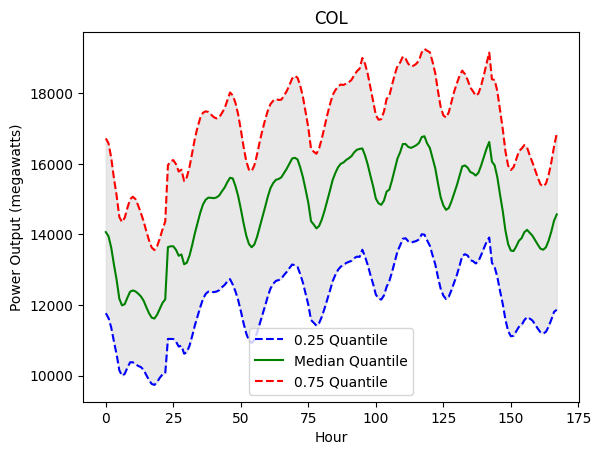

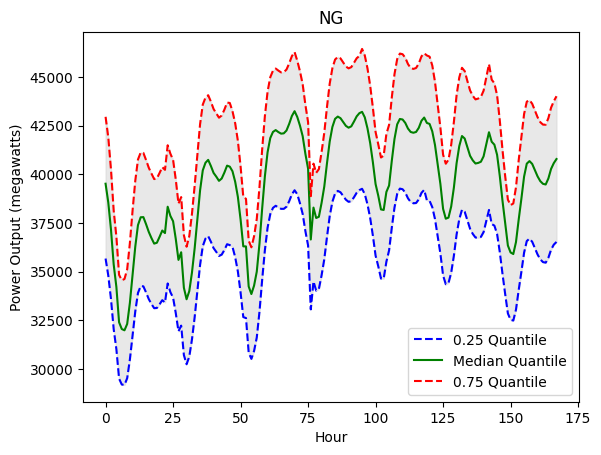

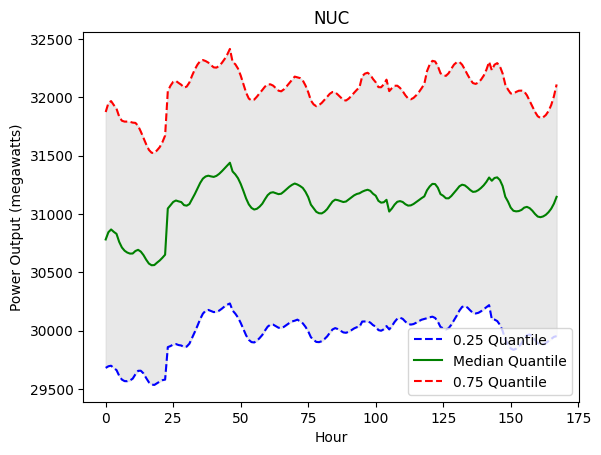

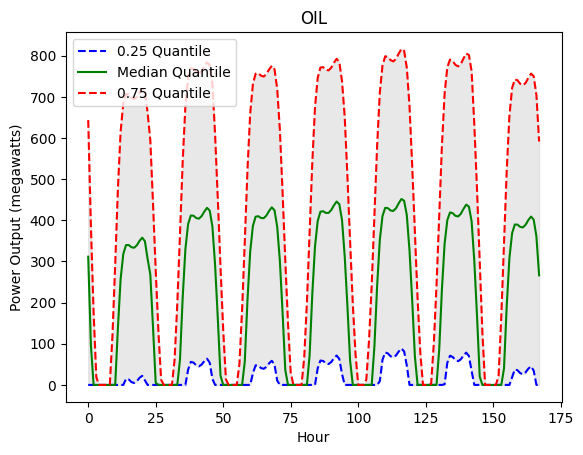

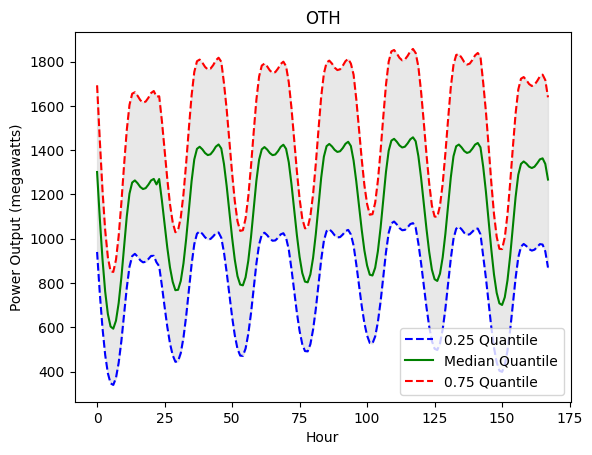

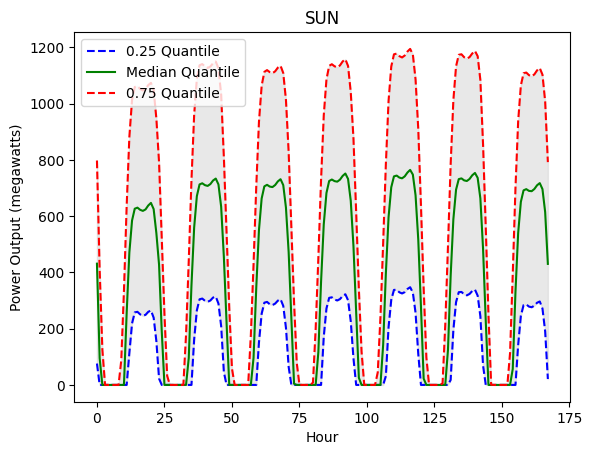

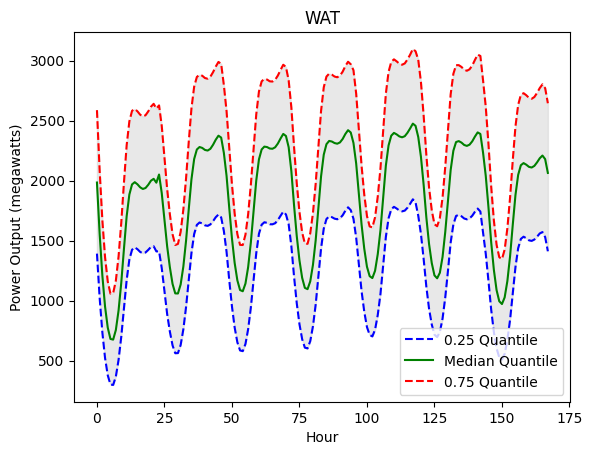

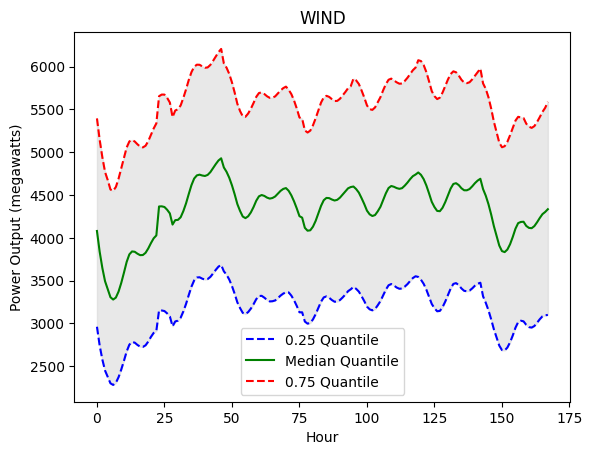

In [ ]:
import matplotlib.pyplot as plt

for fuel_element in fuel_elements:
    df_ = df[df['Fuel_Type'] == fuel_element]

    df_['Hour'] = pd.to_numeric(df_['Hour'], errors='coerce')

    plt.plot(df_.Hour, df_['0.25'], color = 'blue', linestyle = '--', label = '0.25 Quantile')
    plt.plot(df_.Hour, df_['0.5'], color = 'green', label = 'Median Quantile')
    plt.plot(df_.Hour, df_['0.75'], color = 'red', linestyle = '--', label = '0.75 Quantile')

    plt.fill_between(df_.Hour, df_['0.25'], df_['0.75'], color='lightgrey', alpha=0.5)

    plt.legend()
    plt.title(fuel_element)
    plt.xlabel('Hour')
    plt.ylabel('Power Output (megawatts)')
    plt.show()

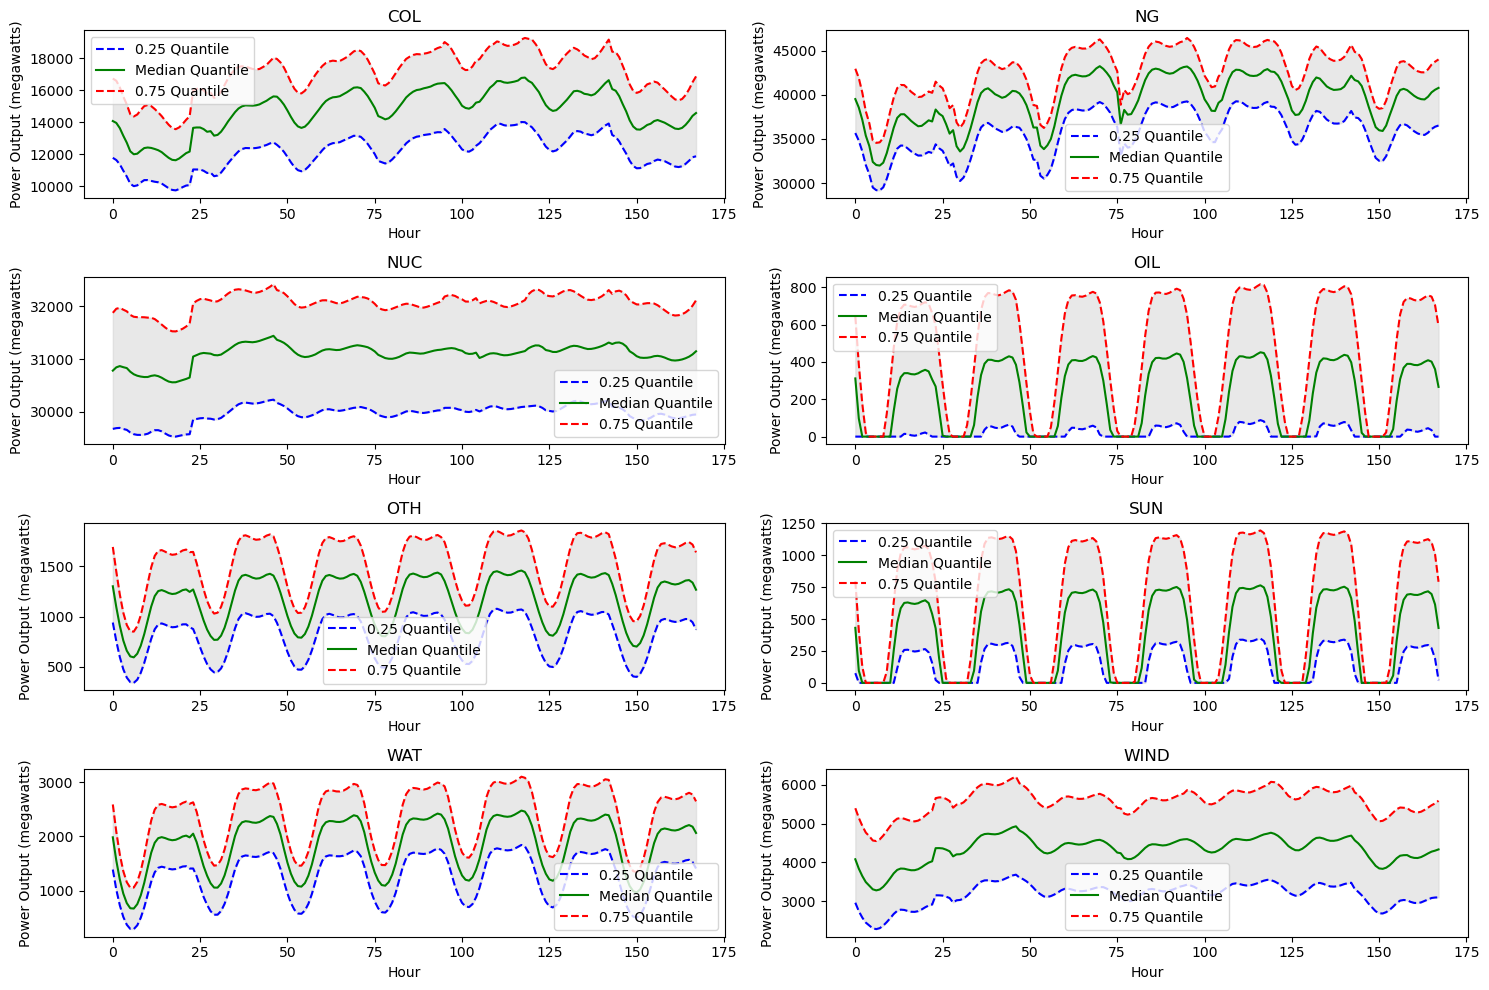

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, figsize=(15, 10))  # Creating a 4x2 grid of subplots

for i, fuel_element in enumerate(fuel_elements):
    df_ = df[df['Fuel_Type'] == fuel_element]
    df_['Hour'] = pd.to_numeric(df_['Hour'], errors='coerce')

    row = i // 2  # Row index for the subplot
    col = i % 2   # Column index for the subplot

    axs[row, col].plot(df_.Hour, df_['0.25'], color='blue', linestyle='--', label='0.25 Quantile')
    axs[row, col].plot(df_.Hour, df_['0.5'], color='green', label='Median Quantile')
    axs[row, col].plot(df_.Hour, df_['0.75'], color='red', linestyle='--', label='0.75 Quantile')
    axs[row, col].fill_between(df_.Hour, df_['0.25'], df_['0.75'], color='lightgrey', alpha=0.5)

    axs[row, col].legend()
    axs[row, col].set_title(fuel_element)
    axs[row, col].set_xlabel('Hour')
    axs[row, col].set_ylabel('Power Output (megawatts)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### True Values Compared to 25th and 75h Quantiles

In [ ]:
import sqlite3
from datetime import datetime as dt

conn = sqlite3.connect("power_production.db")
df_true = pd.read_sql(
    f"SELECT * FROM power_production",
    conn,
    ).drop_duplicates()
conn.close()

In [ ]:
df_true.date = pd.to_datetime(df_true.date)
df_true['Date'] = df_true['date'].dt.date
df_true['Hour'] = df_true['date'].dt.hour
df_true = df_true.drop('date', axis = 1)

In [ ]:
df_true = df_true[df_true.Date > dt.strptime('2023-12-31', '%Y-%m-%d').date()]
df_true = df_true[df_true.Date <= dt.strptime('2024-01-07', '%Y-%m-%d').date()]

In [ ]:
df_true

,respondent,fueltype,type-name,value,value-units,Date,Hour
319000,PJM,WND,Wind,4494.0,megawatthours,2024-01-01,0
319001,PJM,SUN,Solar,21.0,megawatthours,2024-01-01,0
319002,PJM,OIL,Petroleum,210.0,megawatthours,2024-01-01,0
319003,PJM,OTH,Other,1008.0,megawatthours,2024-01-01,0
319004,PJM,NUC,Nuclear,33462.0,megawatthours,2024-01-01,0
...,...,...,...,...,...,...,...
320339,PJM,NG,Natural gas,46715.0,megawatthours,2024-01-07,23
320340,PJM,SUN,Solar,16.0,megawatthours,2024-01-07,23
320341,PJM,NUC,Nuclear,33621.0,megawatthours,2024-01-07,23
320342,PJM,OIL,Petroleum,212.0,megawatthours,2024-01-07,23


In [ ]:
# Assuming the week starts on 2024-01-01
start_of_week = dt(2024, 1, 1).date()

# Calculate the hour of the week
df_true['Hour'] = df_true.apply(lambda row: (row['Date'] - start_of_week).days * 24 + row['Hour'], axis=1)

In [ ]:
df_true

,respondent,fueltype,type-name,value,value-units,Date,Hour
319000,PJM,WND,Wind,4494.0,megawatthours,2024-01-01,0
319001,PJM,SUN,Solar,21.0,megawatthours,2024-01-01,0
319002,PJM,OIL,Petroleum,210.0,megawatthours,2024-01-01,0
319003,PJM,OTH,Other,1008.0,megawatthours,2024-01-01,0
319004,PJM,NUC,Nuclear,33462.0,megawatthours,2024-01-01,0
...,...,...,...,...,...,...,...
320339,PJM,NG,Natural gas,46715.0,megawatthours,2024-01-07,167
320340,PJM,SUN,Solar,16.0,megawatthours,2024-01-07,167
320341,PJM,NUC,Nuclear,33621.0,megawatthours,2024-01-07,167
320342,PJM,OIL,Petroleum,212.0,megawatthours,2024-01-07,167


In [ ]:
df_true['fueltype'] = df_true['fueltype'].replace({'WND': 'WIND'})

In [ ]:
df['Hour'] = df['Hour'].astype(int)

# Renaming the 'fueltype' column in df1 to 'Fuel_Type' to match df2 for a consistent merge key
df_true.rename(columns={'fueltype': 'Fuel_Type'}, inplace=True)

# Performing the merge
# Note: 'Fuel_Type' in df1 must match 'Fuel_Type' in df2 and 'Hour' must be the same data type
merged_df = pd.merge(df, df_true, on=['Fuel_Type', 'Hour'])

# Display the first few rows of the merged DataFrame
print(merged_df.head())

  Fuel_Type  Hour         0.02          0.1          0.25           0.5  \
0       COL     0  5646.165039  9407.861328  11768.099609  14067.033203   
1       COL     1  5633.051758  9402.603516  11629.023438  13949.698242   
2       COL     2  5548.652344  9194.716797  11361.055664  13626.250977   
3       COL     3  5355.819336  8834.509766  10965.467773  13150.486328   
4       COL     4  5138.300781  8486.125000  10596.330078  12713.984375   

           0.75           0.9          0.98 respondent type-name    value  \
0  16724.666016  19624.226562  24132.378906        PJM      Coal  14814.0   
1  16584.007812  19669.761719  23812.164062        PJM      Coal  14711.0   
2  16172.354492  19372.988281  23120.279297        PJM      Coal  14459.0   
3  15596.575195  18859.439453  22244.662109        PJM      Coal  13807.0   
4  15102.544922  18383.898438  21550.912109        PJM      Coal  13674.0   

     value-units        Date  
0  megawatthours  2024-01-01  
1  megawatthours  2024-0

In [ ]:
merged_df.to_csv('look.csv')

In [ ]:
merged_df['residual'] = merged_df['value'] - merged_df['0.5']

In [ ]:
merged_df

,Fuel_Type,Hour,0.02,0.1,0.25,0.5,0.75,0.9,0.98,respondent,type-name,value,value-units,Date,residual
0,COL,0,5646.165039,9407.861328,11768.099609,14067.033203,16724.666016,19624.226562,24132.378906,PJM,Coal,14814.0,megawatthours,2024-01-01,746.966797
1,COL,1,5633.051758,9402.603516,11629.023438,13949.698242,16584.007812,19669.761719,23812.164062,PJM,Coal,14711.0,megawatthours,2024-01-01,761.301758
2,COL,2,5548.652344,9194.716797,11361.055664,13626.250977,16172.354492,19372.988281,23120.279297,PJM,Coal,14459.0,megawatthours,2024-01-01,832.749023
3,COL,3,5355.819336,8834.509766,10965.467773,13150.486328,15596.575195,18859.439453,22244.662109,PJM,Coal,13807.0,megawatthours,2024-01-01,656.513672
4,COL,4,5138.300781,8486.125000,10596.330078,12713.984375,15102.544922,18383.898438,21550.912109,PJM,Coal,13674.0,megawatthours,2024-01-01,960.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,WIND,163,977.677490,2098.194336,3007.761719,4181.256836,5352.386719,7057.230469,8717.193359,PJM,Wind,4333.0,megawatthours,2024-01-07,151.743164
1340,WIND,164,943.989258,2112.238770,3048.978271,4231.273438,5409.724609,7081.354492,8721.742188,PJM,Wind,4114.0,megawatthours,2024-01-07,-117.273438
1341,WIND,165,891.991455,2120.404053,3082.838623,4276.267578,5470.638672,7100.485840,8726.942383,PJM,Wind,4466.0,megawatthours,2024-01-07,189.732422
1342,WIND,166,827.958008,2117.005859,3094.730713,4301.585449,5518.286133,7105.862305,8725.839844,PJM,Wind,4407.0,megawatthours,2024-01-07,105.414551


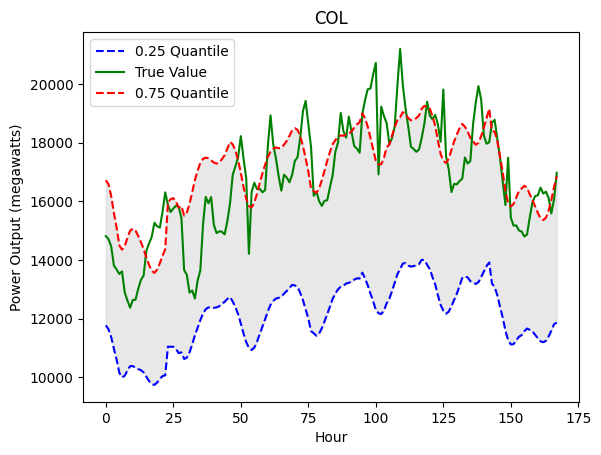

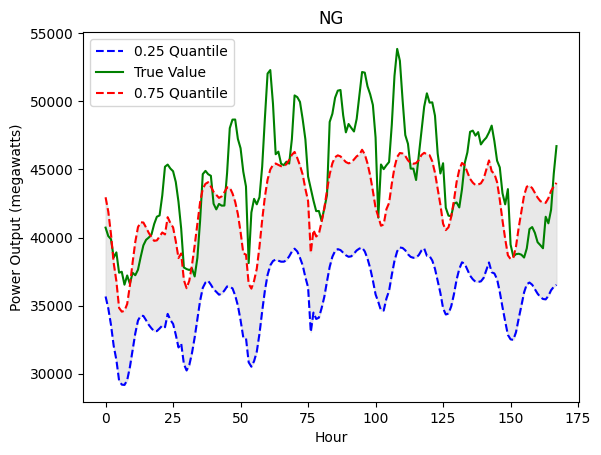

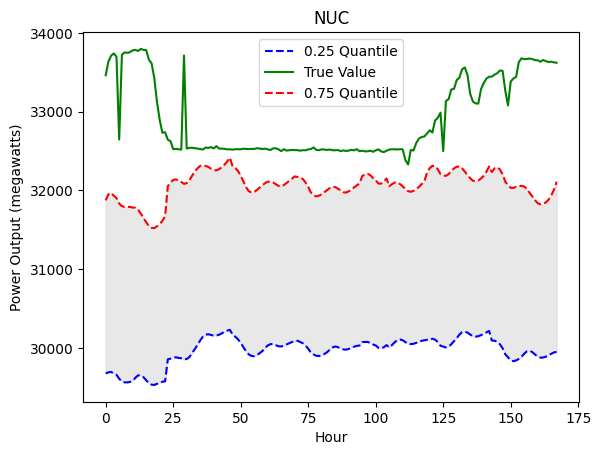

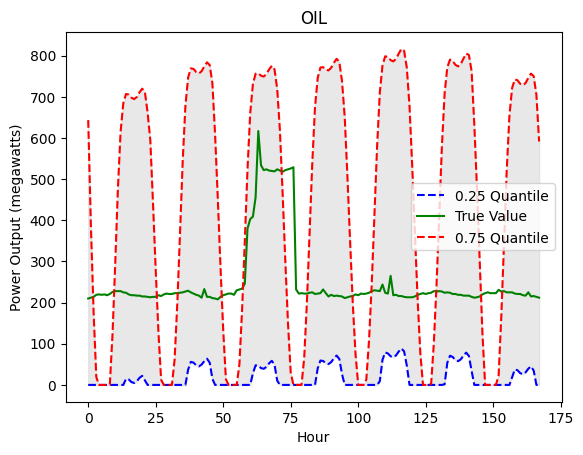

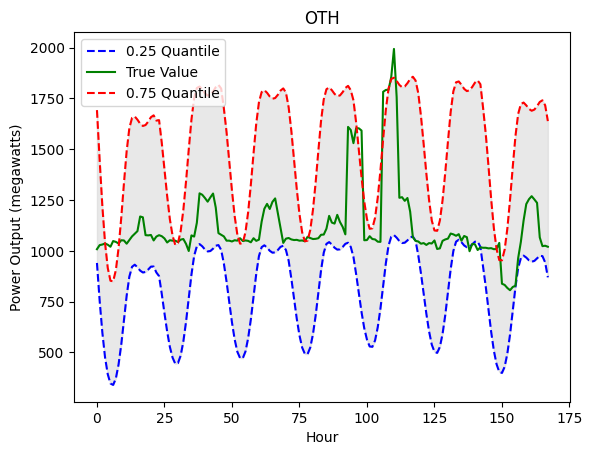

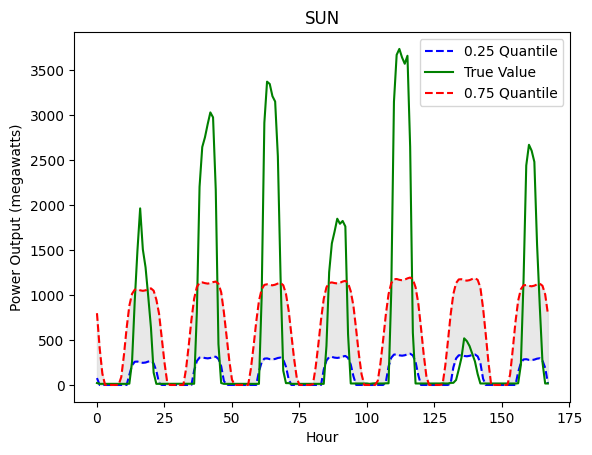

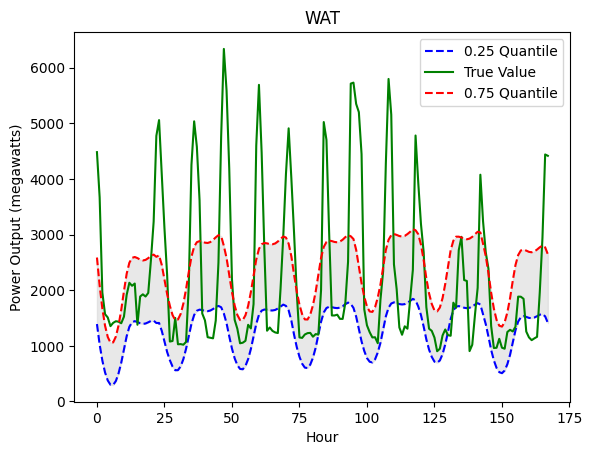

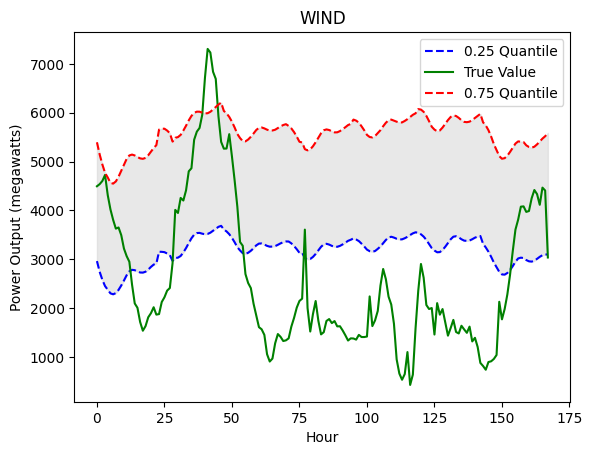

In [ ]:
import matplotlib.pyplot as plt

for fuel_element in fuel_elements:
    df_ = merged_df[merged_df['Fuel_Type'] == fuel_element]

    df_['Hour'] = pd.to_numeric(df_['Hour'], errors='coerce')

    plt.plot(df_.Hour, df_['0.25'], color = 'blue', linestyle = '--', label = '0.25 Quantile')
    plt.plot(df_.Hour, df_['value'], color = 'green', label = 'True Value')
    plt.plot(df_.Hour, df_['0.75'], color = 'red', linestyle = '--', label = '0.75 Quantile')

    plt.fill_between(df_.Hour, df_['0.25'], df_['0.75'], color='lightgrey', alpha=0.5)

    plt.legend()
    plt.title(fuel_element)
    plt.xlabel('Hour')
    plt.ylabel('Power Output (megawatts)')
    plt.show()

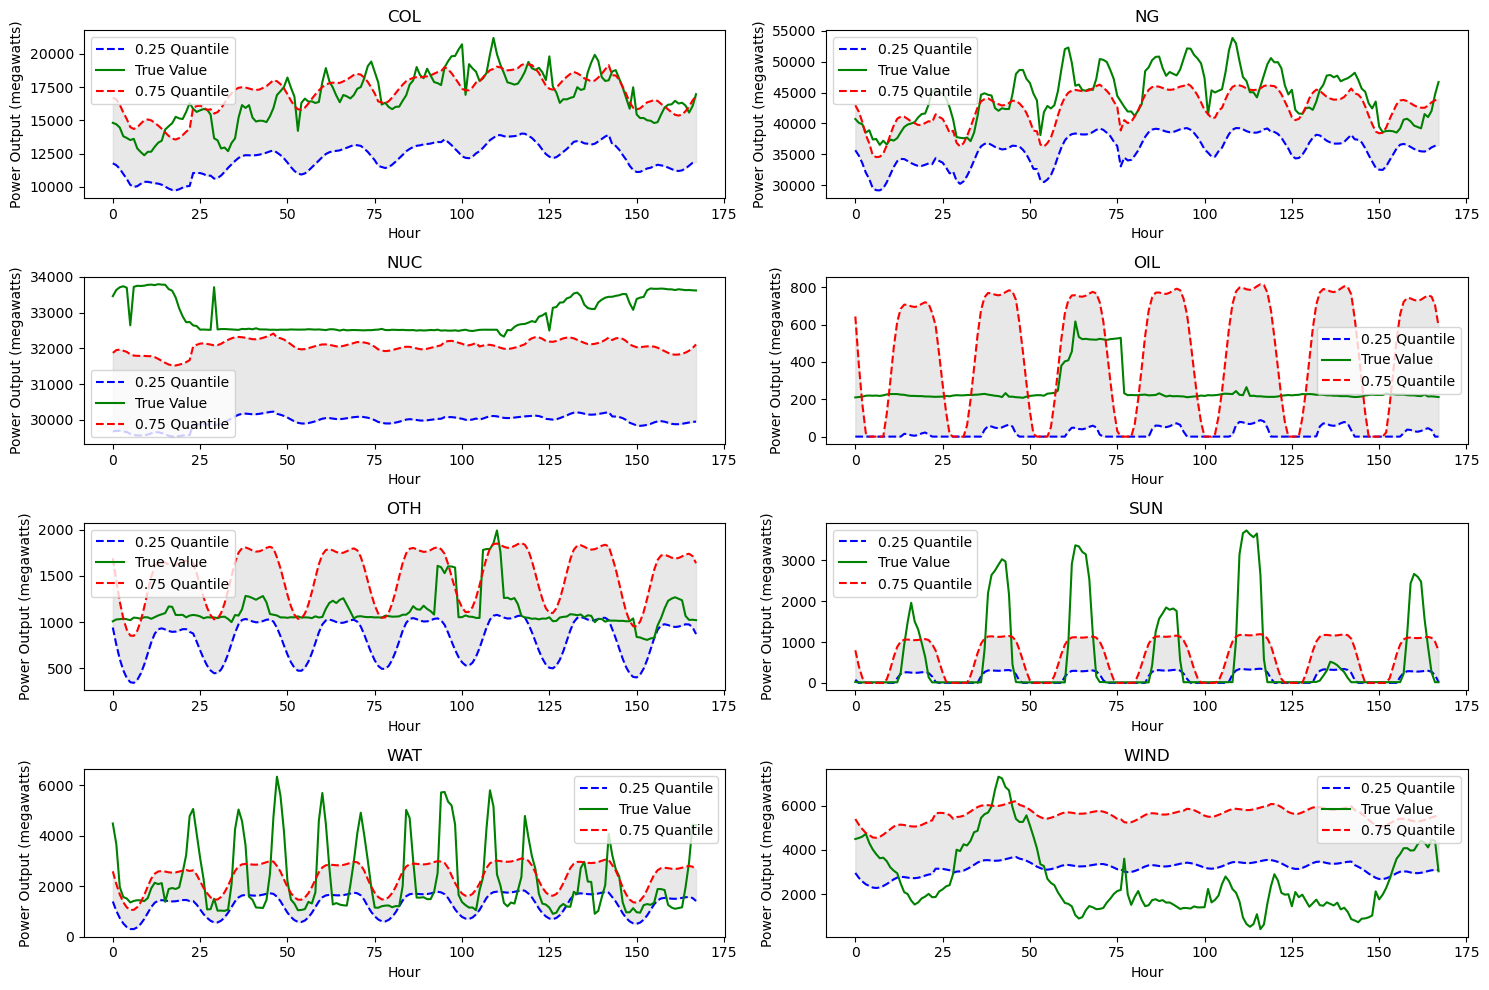

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, figsize=(15, 10))  # Creating a 4x2 grid of subplots

for i, fuel_element in enumerate(fuel_elements):
    df_ = merged_df[merged_df['Fuel_Type'] == fuel_element]
    df_['Hour'] = pd.to_numeric(df_['Hour'], errors='coerce')

    row = i // 2  # subpolot row index 
    col = i % 2   # subplot column index

    axs[row, col].plot(df_.Hour, df_['0.25'], color='blue', linestyle='--', label='0.25 Quantile')
    axs[row, col].plot(df_.Hour, df_['value'], color='green', label='True Value')
    axs[row, col].plot(df_.Hour, df_['0.75'], color='red', linestyle='--', label='0.75 Quantile')
    axs[row, col].fill_between(df_.Hour, df_['0.25'], df_['0.75'], color='lightgrey', alpha=0.5)

    axs[row, col].legend()
    axs[row, col].set_title(fuel_element)
    axs[row, col].set_xlabel('Hour')
    axs[row, col].set_ylabel('Power Output (megawatts)')

plt.tight_layout() 
plt.show()

### Under-Predicted and Over-Predicted Compared to True Power Output Values

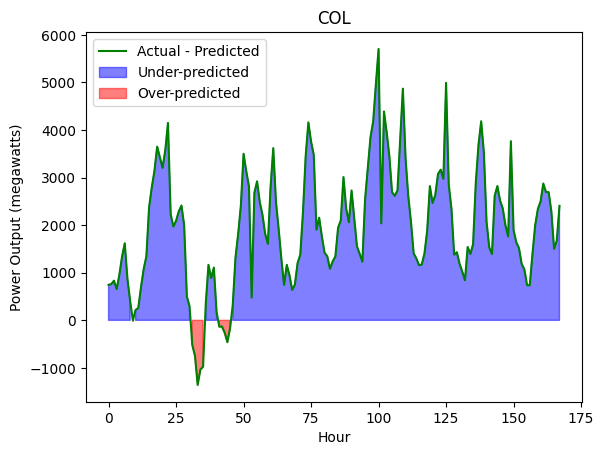

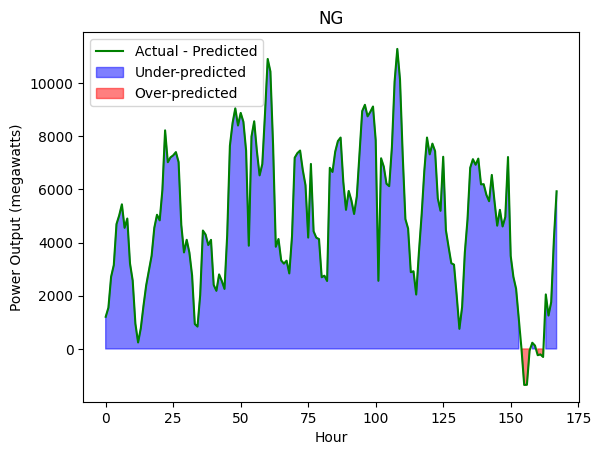

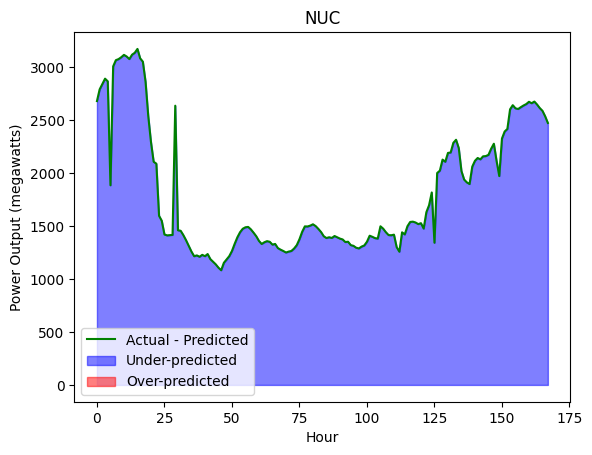

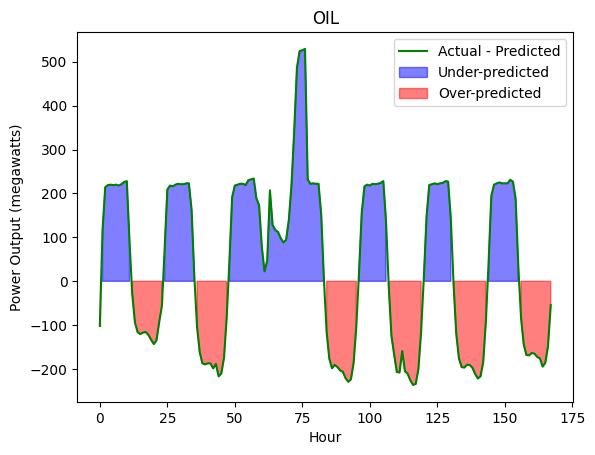

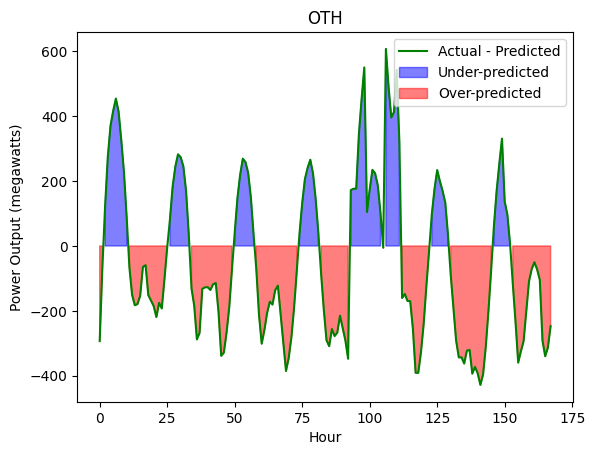

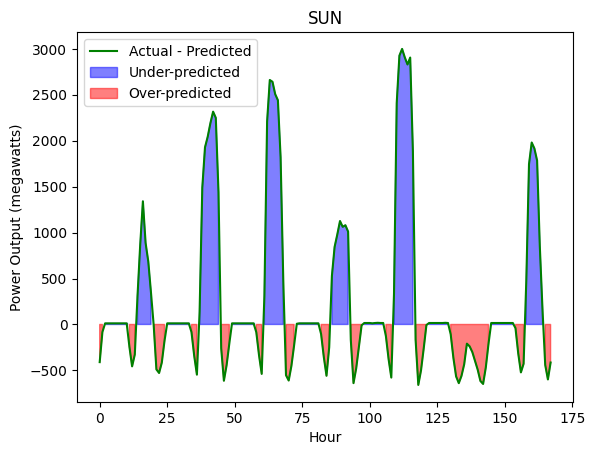

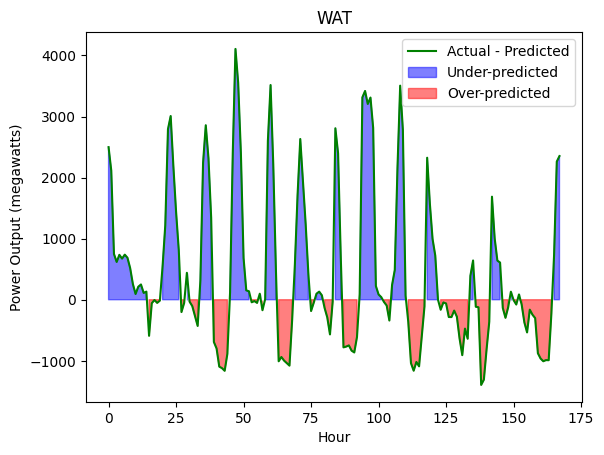

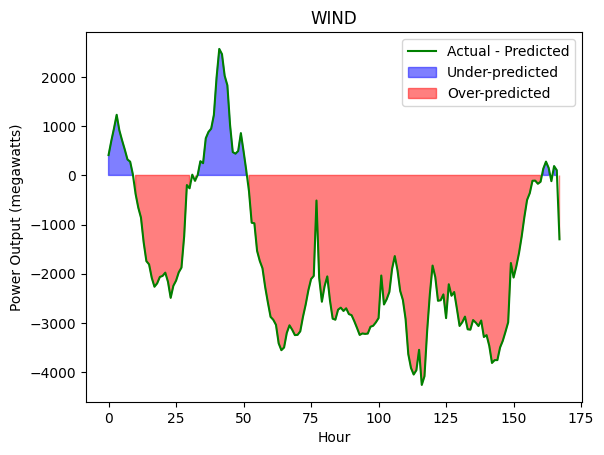

In [ ]:
for fuel_element in fuel_elements:
    df_ = merged_df[merged_df['Fuel_Type'] == fuel_element]

    df_['Hour'] = pd.to_numeric(df_['Hour'], errors='coerce')

    # Plot the line
    plt.plot(df_.Hour, df_['residual'], color='green', label='Actual - Predicted')
    
    # Fill above 0 with blue
    plt.fill_between(df_.Hour, df_['residual'], 0, where=(df_['residual'] >= 0), color='blue', alpha=0.5, label='Under-predicted')
    
    # Fill below 0 with red
    plt.fill_between(df_.Hour, df_['residual'], 0, where=(df_['residual'] < 0), color='red', alpha=0.5, label='Over-predicted')

    # To avoid duplicate labels in the legend, handle labels manually
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicates
    plt.legend(by_label.values(), by_label.keys())

    plt.title(fuel_element)
    plt.xlabel('Hour')
    plt.ylabel('Power Output (megawatts)')
    plt.show()

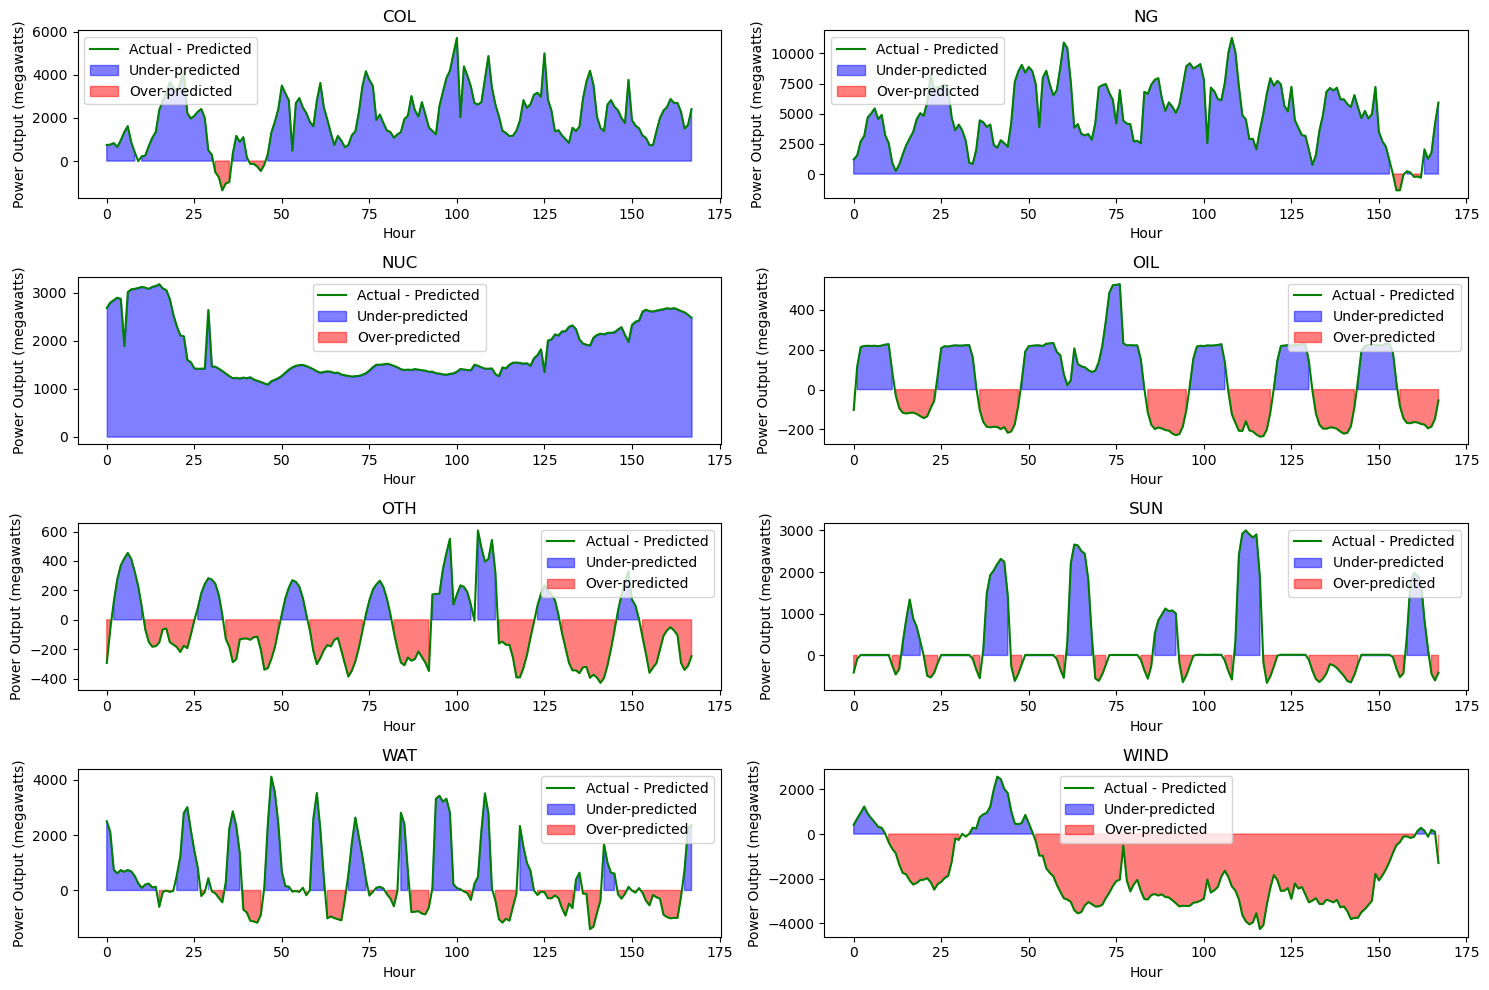

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, figsize=(15, 10))  # Creating a 4x2 grid of subplots

for i, fuel_element in enumerate(fuel_elements):
    df_ = merged_df[merged_df['Fuel_Type'] == fuel_element]
    df_['Hour'] = pd.to_numeric(df_['Hour'], errors='coerce')

    row = i // 2  # Row index
    col = i % 2   # Column index

    axs[row, col].plot(df_.Hour, df_['residual'], color='green', label='Actual - Predicted')
    axs[row, col].fill_between(df_.Hour, df_['residual'], 0, where=(df_['residual'] >= 0), color='blue', alpha=0.5, label='Under-predicted')
    axs[row, col].fill_between(df_.Hour, df_['residual'], 0, where=(df_['residual'] < 0), color='red', alpha=0.5, label='Over-predicted')

    handles, labels = axs[row, col].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicates
    axs[row, col].legend(by_label.values(), by_label.keys())

    axs[row, col].set_title(fuel_element)
    axs[row, col].set_xlabel('Hour')
    axs[row, col].set_ylabel('Power Output (megawatts)')

plt.tight_layout() 
plt.show()

### Heat Maps of Power Output Values

In [ ]:
pivot_df = df.pivot_table(values='0.5', index='Fuel_Type', columns='Hour', aggfunc='median')

pivot_df

Hour,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
Fuel_Type,,,,,,,,,,,,,,,,,,,,,
COL,14067.033203,13949.698242,1.362625e+04,13150.486328,12713.984375,12177.977539,11990.369141,12025.962891,12211.455078,12378.876953,...,13965.378906,13839.578125,13710.349609,13595.068359,13568.482422,13637.513672,13827.246094,14084.345703,14392.015625,14569.074219
NG,39517.578125,38557.339844,3.716729e+04,35376.800781,34212.261719,32395.175781,32047.259766,31982.242188,32309.396484,33389.023438,...,40536.968750,40222.339844,39893.640625,39649.660156,39512.449219,39477.261719,39787.234375,40280.324219,40575.648438,40786.437500
NUC,30781.337891,30843.570312,3.086715e+04,30846.642578,30829.613281,30760.460938,30712.564453,30684.822266,30668.826172,30660.050781,...,31028.666016,31000.328125,30977.990234,30972.396484,30978.822266,30992.740234,31015.218750,31045.324219,31088.203125,31147.003906
OIL,311.654724,96.972977,2.662039e-36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,389.802734,389.587524,384.023712,382.872192,389.251465,400.529755,409.221069,401.674286,361.109070,266.278839
OTH,1301.183960,1093.246460,9.087209e+02,761.285645,659.632263,603.269653,593.641907,629.805725,709.462708,824.916809,...,1348.847046,1339.146240,1325.383179,1319.121582,1325.063965,1340.505615,1358.254028,1362.935181,1337.943115,1267.100098
SUN,430.977783,95.340698,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,691.516235,695.802795,689.674622,688.530823,696.284668,709.527771,717.318115,695.988708,614.504089,430.163513
WAT,1984.274048,1555.799072,1.209660e+03,950.189209,774.676636,680.352539,674.620361,754.750732,916.542175,1147.397339,...,2146.233887,2133.041748,2114.888184,2109.343994,2122.786377,2152.364990,2186.616455,2209.117432,2179.239502,2064.378906
WIND,4079.630371,3838.505371,3.647466e+03,3492.889160,3397.367920,3305.878418,3278.582520,3301.142090,3371.381592,3472.784424,...,4187.493652,4138.621094,4115.724121,4112.069336,4136.498535,4181.256836,4231.273438,4276.267578,4301.585449,4333.803711


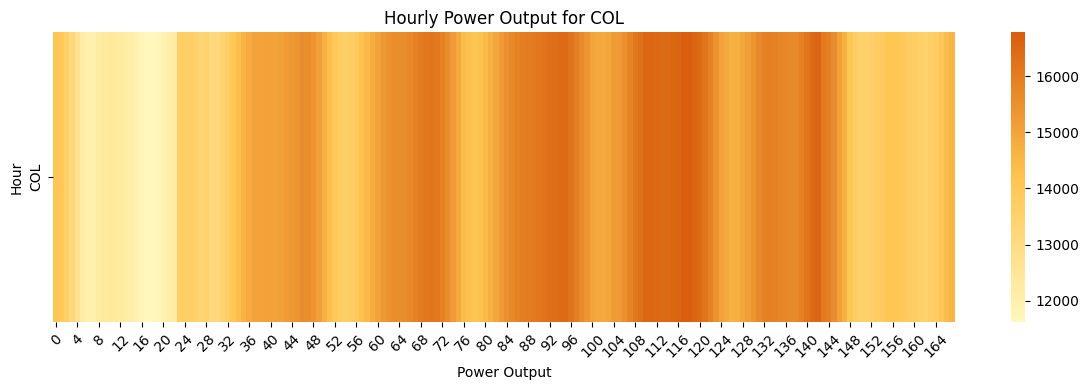

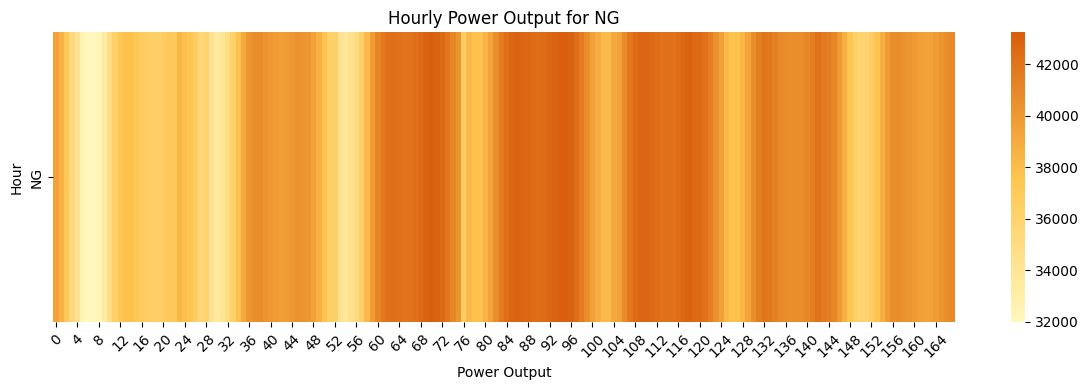

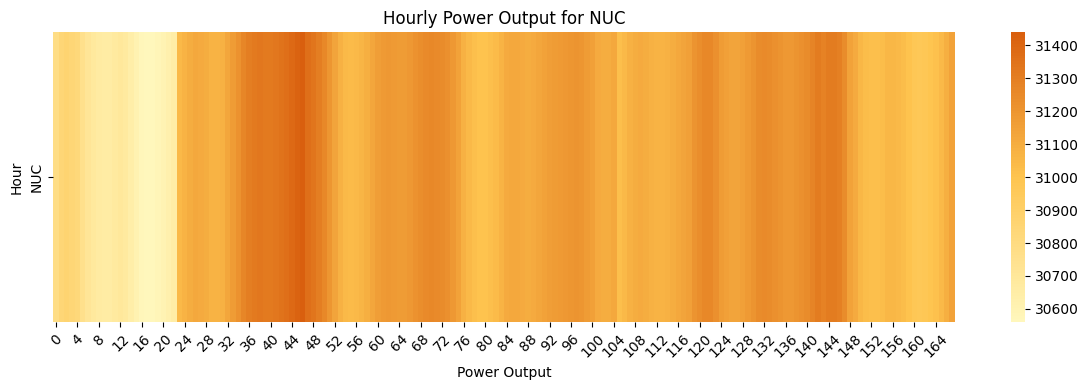

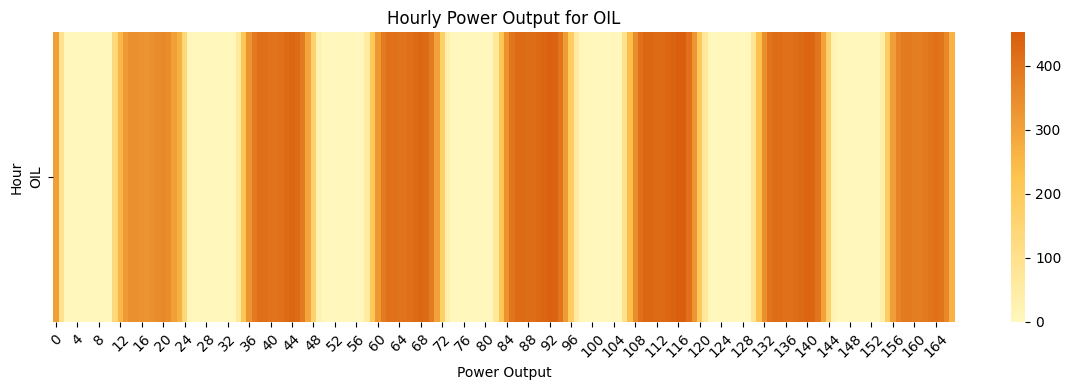

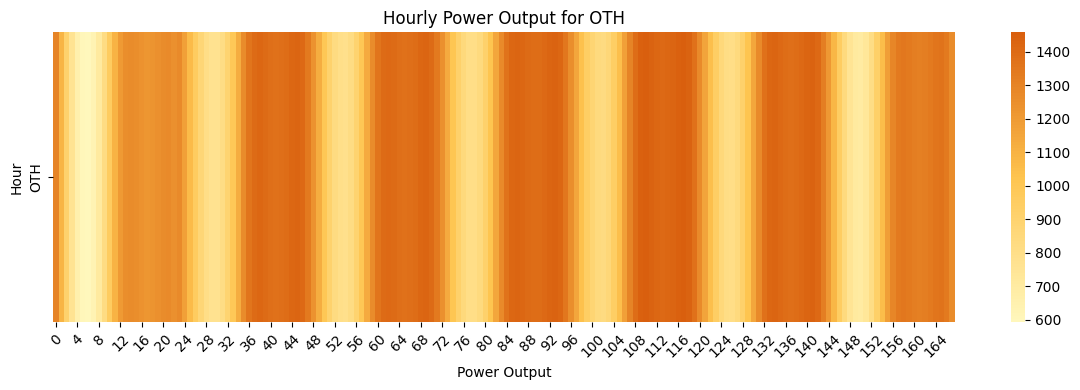

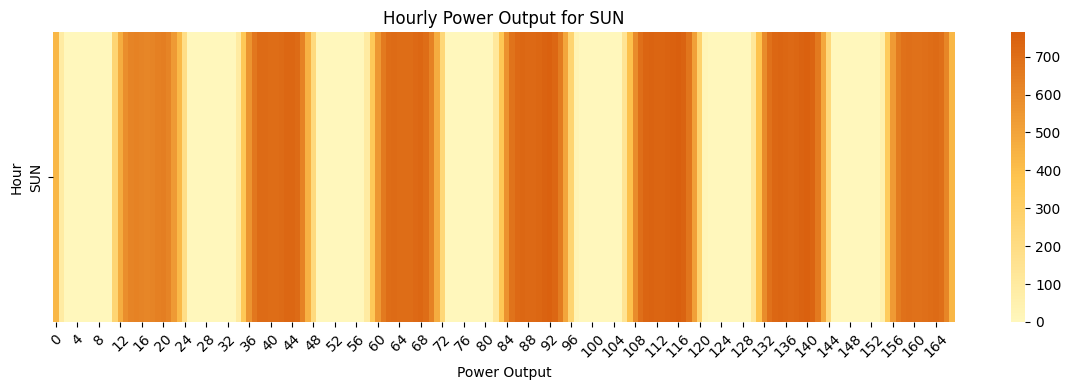

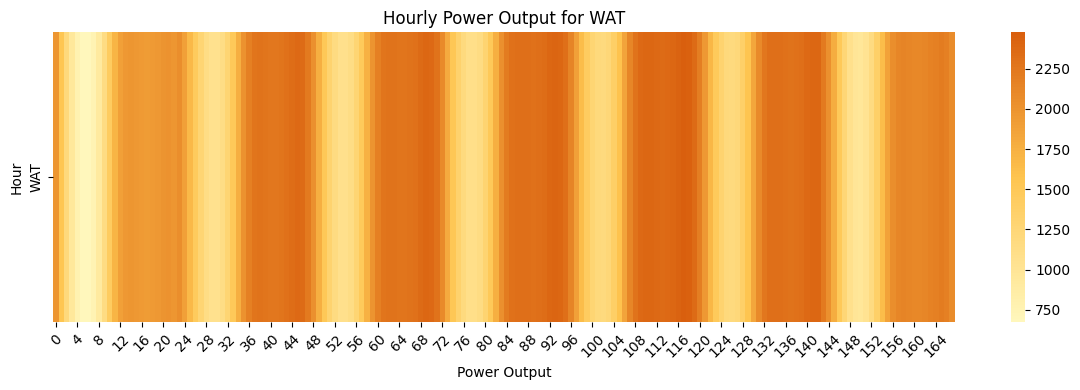

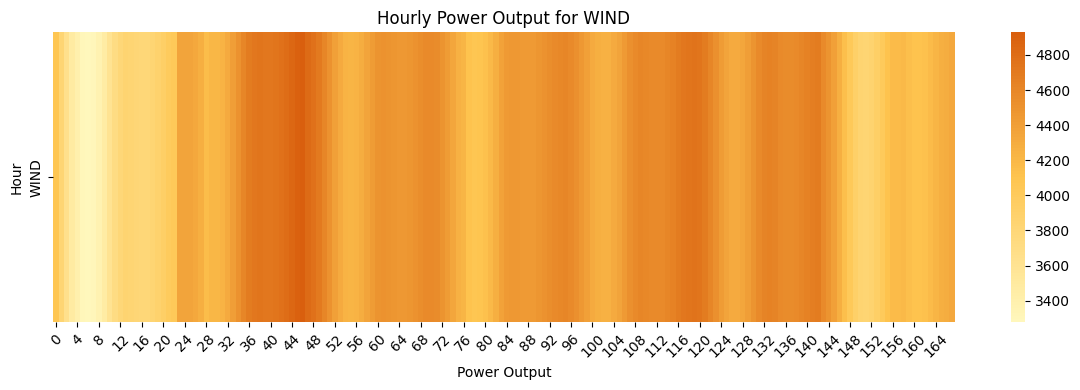

In [ ]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

colors = ["#fff7bc", "#fec44f", "#d95f0e"]
cmap_name = "custom_orange_red"
n_bins = 100  # Increase for finer color transitions
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

for fuel_type in df['Fuel_Type'].unique():
    # Filter the DataFrame for the current fuel type
    df_filtered = df[df['Fuel_Type'] == fuel_type]
    
    # Pivot the filtered DataFrame to format it for the heatmap
    pivot_df = df_filtered.pivot_table(values='0.5', index='Fuel_Type', columns='Hour', aggfunc='median')
    
    # Creating the heatmap for the current fuel type
    plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
    sns.heatmap(pivot_df, cmap=cmap)#, annot=True, fmt=".1f", linewidths=.5)
    plt.title(f'Hourly Power Output for {fuel_type}')
    plt.ylabel('Hour')
    plt.xlabel('Power Output')
    plt.xticks(rotation=45)  # Improves readability of x-axis labels
    plt.tight_layout()  # Adjust subplot params so the plot fits into the figure area
    plt.show()